# **Data Preparation**

## Load Data

### Menghubungkan ke Google Drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjEn7UXwiFNf55BhSslfeomE6MKmBopDP_7KbyPw901cMq2VKqAZN4
Mounted at /content/drive


## Download Dataset Kaggle

### Memasang(*Install*) Kaggle

In [2]:
! pip install -q kaggle

### Change Directory

In [3]:
%cd /content/drive/MyDrive/Dataset/Kaggle

/content/drive/MyDrive/Dataset/Kaggle


### Membuat Folder Film Rekomendasi

In [4]:
!mkdir '/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation'

mkdir: cannot create directory ‘/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation’: File exists


### Masuk ke folder kerja Film Recomendation

In [5]:
%cd /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation

/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation


### Mengunggah API Kaggle ke folder kerja

In [6]:
from google.colab import files

files.upload()

{}

### Konfigurasi ke path "Kaggle.json"

In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation"

### Download Dataset dari Kaggle

In [8]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip Dataset

In [9]:
!unzip '/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/the-movies-dataset.zip' -d '/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation'

Archive:  /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/the-movies-dataset.zip
replace /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/credits.csv  
  inflating: /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/keywords.csv  
  inflating: /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/links.csv  
  inflating: /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/links_small.csv  
  inflating: /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/movies_metadata.csv  
  inflating: /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/ratings.csv  
  inflating: /content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/ratings_small.csv  


# **Univariate Exploratory Data Analysis**

## Import Library dan Read Dataset CSV

In [10]:
import numpy as np
import pandas as pd
import nltk
import re
re.compile('<title>(.*)</title>')
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

data1 = pd.read_csv('/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/ratings_small.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Dataset/Kaggle/Film Rekomendation/movies_metadata.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Melihat Dataset

### Melihat dataset "data1" bagian head  

In [11]:
data1.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Melihat dataset "data2" bagian head

In [12]:
data2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Melakukan konfigurasi pada kolom genres

Mengambil bagian genres nya saja yaitu menghapus variabel id berserta nilainya dan juga menghapus variabel nama

In [13]:
data2['genres'] = data2['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x,list) else [])

## Melihat dataset "data2" setelah dilakukan perubahan

In [14]:
data2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Melihat Data Info

### Melihat data info pada data1

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Melihat data info pada data3

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

## Melihat Jumalah Data Baris dan Kolom

In [17]:
print("Jumlah dataset pada data1 : ",data1.shape)
print("============================")
print("Jumlah Dataset pada data2 : ",data2.shape)

Jumlah dataset pada data1 :  (100004, 4)
Jumlah Dataset pada data2 :  (45466, 24)


## Mengecek Missing Value Dataset 

In [18]:
print("Dataset 1")
print(data1.isnull().sum())
print("======================================")
print("Dataset 2")
print(data2.isnull().sum())

Dataset 1
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Dataset 2
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


# **Data Preprocessing**

## Mengubah data list menjadi string

In [19]:
data2["gen_list"] = data2["genres"]
data2["gen_list"] = data2["gen_list"].apply(lambda x: " ".join(x))

## Mengecek data2

In [20]:
data2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,gen_list
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Animation Comedy Family
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Adventure Fantasy Family
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Romance Comedy
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Comedy Drama Romance
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Comedy


## Menambahkan kolom genres ke dalam kolom overview

In [21]:
data2.overview = data2.gen_list + " " + data2.overview
data2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,gen_list
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Animation Comedy Family Led by Woody, Andy's t...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Animation Comedy Family
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,Adventure Fantasy Family When siblings Judy an...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Adventure Fantasy Family
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,Romance Comedy A family wedding reignites the ...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Romance Comedy
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Comedy Drama Romance Cheated on, mistreated an...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Comedy Drama Romance
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Comedy Just when George Banks has recovered fr...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Comedy


## Menghapus nilai null pada kolom overview

In [22]:
data2["overview"].dropna(inplace = True)
data2["overview"]

0        Animation Comedy Family Led by Woody, Andy's t...
1        Adventure Fantasy Family When siblings Judy an...
2        Romance Comedy A family wedding reignites the ...
3        Comedy Drama Romance Cheated on, mistreated an...
4        Comedy Just when George Banks has recovered fr...
                               ...                        
45461    Drama Family Rising and falling between a man ...
45462    Drama An artist struggles to finish his work w...
45463    Action Drama Thriller When one of her hits goe...
45464     In a small town live two brothers, one a mini...
45465     50 years after decriminalisation of homosexua...
Name: overview, Length: 45466, dtype: object

# **Data Preparation**

## Cleaning Data Overview

### Menghapus tag HTML dan Angka

In [23]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

cleaning = "@\S+|https?:\S+|http?:\S|[^A-Za-z]+"

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(cleaning, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

### Menerapkan hasil cleaning ke data overview

In [24]:
data2.overview = data2.overview.apply(lambda x: preprocess(x, stem = False))
data2.overview

0        animation comedy family led woody andy toys li...
1        adventure fantasy family siblings judy peter d...
2        romance comedy family wedding reignites ancien...
3        comedy drama romance cheated mistreated steppe...
4        comedy george banks recovered daughter wedding...
                               ...                        
45461                drama family rising falling man woman
45462    drama artist struggles finish work storyline c...
45463    action drama thriller one hits goes wrong prof...
45464    small town live two brothers one minister one ...
45465    years decriminalisation homosexuality uk direc...
Name: overview, Length: 45466, dtype: object

# **Model Development : Collaborative Filtering**


## **Data Understanding**

### Membuat Dataset dengan Data Kurang Dari 2000

In [25]:
data1 = data1[data1["userId"] < 2000]

### Melihat Dataset 

In [26]:
data1

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


### Menghapus kolom timestamp

In [27]:
data1 = data1.drop(['timestamp'], axis=1)
data1

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


## **Data Preprocessing**

### Menyimpan dataset data1 pada variabel 

In [28]:
rating_movie = data1
rating_movie.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


### Membuat data baru dari dataset 2

* Membuat dataset baru berisi kolom title dan genre
* Melakukan cek nilai teratas

In [29]:
movie_names = data2
movie_names = movie_names[['title', 'genres']]
movie_names.head()

,title,genres
0,Toy Story,"[Animation, Comedy, Family]"
1,Jumanji,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Romance, Comedy]"
3,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,[Comedy]


### Menggabungkan dataset dari data1 dan data2

* data1 = data yang sudah dibersihkan dan di simpan pada variabel rating_movie
* data2 = dataset baru yang diambil dari data title dan genre yang disimpan dalam variabel movie_names

In [30]:
movie_data = pd.concat([rating_movie, movie_names], axis=1)
movie_data.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Toy Story,"[Animation, Comedy, Family]"
1,1,1029,3.0,Jumanji,"[Adventure, Fantasy, Family]"
2,1,1061,3.0,Grumpier Old Men,"[Romance, Comedy]"
3,1,1129,2.0,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,1,1172,4.0,Father of the Bride Part II,[Comedy]


## Data preparation 

* Mengurutkan nilai dari movieId

In [31]:
preparation = movie_data
preparation.sort_values('movieId')

,userId,movieId,rating,title,genres
9713,68,1,4.0,Beautiful Boxer,[Drama]
35933,261,1,1.5,Chair de poule,"[Crime, Drama]"
52631,383,1,5.0,NaN,NaN
35983,262,1,2.5,Batman: Bad Blood,"[Action, Animation, Science Fiction]"
12038,77,1,4.0,The Good Night,"[Comedy, Drama, Romance, Fantasy, Music]"
...,...,...,...,...,...
39546,287,161944,5.0,The Book of Daniel,[Fantasy]
11823,73,162376,4.5,Caught,"[Drama, Thriller]"
92339,611,162542,5.0,NaN,NaN
92340,611,162672,3.0,NaN,NaN


### Menghapus Nilai Duplikat movieId

In [32]:
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,genres
0,1,31,2.5,Toy Story,"[Animation, Comedy, Family]"
1,1,1029,3.0,Jumanji,"[Adventure, Fantasy, Family]"
2,1,1061,3.0,Grumpier Old Men,"[Romance, Comedy]"
3,1,1129,2.0,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,1,1172,4.0,Father of the Bride Part II,[Comedy]
...,...,...,...,...,...
99131,664,64997,2.5,NaN,NaN
99159,664,72380,3.5,NaN,NaN
99274,665,129,3.0,NaN,NaN
99678,665,4736,1.0,NaN,NaN


### Menghapus Data Kosong (NaN)

In [33]:
data_preparation = preparation.dropna()

### Mengkonversi Data Menjadi List

In [34]:
movie_id = data_preparation['movieId'].tolist() 
movie_name = data_preparation['title'].tolist()
movie_genres = data_preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genres))

6475
6475
6475


### Membuat Directionary Data 

In [35]:
new_movie = pd.DataFrame({
    'id': movie_id,
    'title': movie_name,
    'genres': movie_genres,
})
new_movie

,id,title,genres
0,31,Toy Story,"[Animation, Comedy, Family]"
1,1029,Jumanji,"[Adventure, Fantasy, Family]"
2,1061,Grumpier Old Men,"[Romance, Comedy]"
3,1129,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,1172,Father of the Bride Part II,[Comedy]
...,...,...,...
6470,6013,Hickok,[Western]
6471,6014,Do You Take This Man,[Drama]
6472,6154,Bromance,"[Comedy, Drama, Romance]"
6473,129428,Hit Me,"[Drama, Mystery, Thriller]"


### Melihat Missing Value

In [36]:
new_movie.isnull().sum()

id        0
title     0
genres    0
dtype: int64

### Melakukan Encoding userId

---

1.   Merubah data userId menjadi List dan Memiliki nilai yang unik (Tidak sama)
2.   Melakukan Encoding Data userId
3.   Melakukan encoding angka ke userId 

---





In [37]:
user_ids = data1['userId'].unique().tolist()
print('list userId: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

### Melakukan Encoding movieId

---

1.   Merubah data movieId menjadi List dan Memiliki nilai yang unik (Tidak sama)
2.   Melakukan Encoding Data movieId
3.   Melakukan encoding angka ke movieId 

---

In [38]:
movie_ids = data1['movieId'].unique().tolist()
print('list movieId: ', movie_ids) 

movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId : ', movie_to_movie_encoded) 

movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieId: ', movie_encoded_to_movie)

list movieId:  [31, 1029, 1061, 1129, 1172, 1263, 1287, 1293, 1339, 1343, 1371, 1405, 1953, 2105, 2150, 2193, 2294, 2455, 2968, 3671, 10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 153, 161, 165, 168, 185, 186, 208, 222, 223, 225, 235, 248, 253, 261, 265, 266, 272, 273, 292, 296, 300, 314, 317, 319, 339, 349, 350, 356, 357, 364, 367, 370, 371, 372, 377, 382, 405, 410, 454, 457, 468, 474, 480, 485, 497, 500, 508, 509, 515, 527, 537, 539, 550, 551, 552, 585, 586, 587, 588, 589, 590, 592, 593, 616, 661, 720, 60, 247, 267, 318, 355, 595, 736, 778, 866, 1197, 1210, 1235, 1271, 1378, 1580, 1721, 1884, 2028, 2318, 2513, 2694, 2702, 2716, 2762, 2841, 2858, 2959, 3243, 3510, 3949, 5349, 5669, 6377, 7153, 7361, 8622, 8636, 27369, 44191, 48783, 50068, 58559, 84236, 34, 112, 141, 173, 260, 289, 329, 380, 431, 434, 435, 440, 442, 464, 541, 594, 596, 610, 858, 903, 910, 913, 919, 1011, 1016, 1022, 1028, 1030, 1031, 1032, 1033, 1036, 1073, 1079, 1089, 1097, 1125, 1127, 1136, 1194, 1196, 1198, 1200, 1206,

### Mapping Data

---
1.   Mapping userID ke dataframe user
2.   Mapping movieId ke dataframe movie

---




In [39]:
data1['user'] = data1['userId'].map(user_to_user_encoded)
data1['movie'] = data1['movieId'].map(movie_to_movie_encoded)

### Melakukan Verifikasi Data

---
1.   Mendapatkan jumlah user
2.   Mendapatkan jumlah movie
3.   Mengubah rating menjadi nilai float
4.   Nilai minimum rating
5.   Nilai maximum rating
---






In [40]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
data1['rating'] = data1['rating'].values.astype(np.float32)
min_rating = min(data1['rating'])
max_rating = max(data1['rating'])
 
print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

671
9066
Number of User: 671, Number of Movie: 9066, Min Rating: 0.5, Max Rating: 5.0


### Rendom Distribusi Dataset

In [41]:
df = data1.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user,movie
19090,128,1028,5.0,127,165
99678,665,4736,1.0,664,9064
18455,120,4002,3.0,119,2763
35755,257,1274,4.0,256,2190
66536,468,6440,4.0,467,1333
...,...,...,...,...,...
6265,33,3911,5.0,32,1098
54886,394,377,3.0,393,64
76820,532,1347,3.5,531,2199
860,12,3408,4.0,11,346


## Split Data Manjadi Training 80% dan Validasi 20%


---
1.   Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
2.   Membuat variabel y untuk membuat rating dari hasil 
3.   Membagi menjadi 80% data train dan 20% data validasi


---






In [42]:
x = df[['user', 'movie']].values
 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 127  165]
 [ 664 9064]
 [ 119 2763]
 ...
 [ 531 2199]
 [  11  346]
 [ 101   17]] [1.         0.11111111 0.55555556 ... 0.66666667 0.77777778 0.55555556]


## **Training**

### Membuat Fungsi Rekomendasi 


In [43]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( 
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.resto_embedding = layers.Embedding( 
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_movie, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1]) 
    resto_bias = self.resto_bias(inputs[:, 1]) 
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) 


### Compile model Dengan Metode BinaryCrossentropy

In [44]:
model = RecommenderNet(num_users, num_movie, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### Melakukan Training Data

In [45]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 20,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
4001/4001 [==============================] - 29s 7ms/step - loss: 0.6266 - root_mean_squared_error: 0.2328 - val_loss: 0.6101 - val_root_mean_squared_error: 0.2154
Epoch 2/100
4001/4001 [==============================] - 28s 7ms/step - loss: 0.6027 - root_mean_squared_error: 0.2080 - val_loss: 0.6050 - val_root_mean_squared_error: 0.2100
Epoch 3/100
4001/4001 [==============================] - 29s 7ms/step - loss: 0.5982 - root_mean_squared_error: 0.2031 - val_loss: 0.6027 - val_root_mean_squared_error: 0.2074
Epoch 4/100
4001/4001 [==============================] - 28s 7ms/step - loss: 0.5956 - root_mean_squared_error: 0.2001 - val_loss: 0.6013 - val_root_mean_squared_error: 0.2058
Epoch 5/100
4001/4001 [==============================] - 27s 7ms/step - loss: 0.5939 - root_mean_squared_error: 0.1981 - val_loss: 0.6007 - val_root_mean_squared_error: 0.2051
Epoch 6/100
4001/4001 [==============================] - 28s 7ms/step - loss: 0.5927 - root_mean_squared_error: 0.1965 -

## Visualisasi Data Training Model

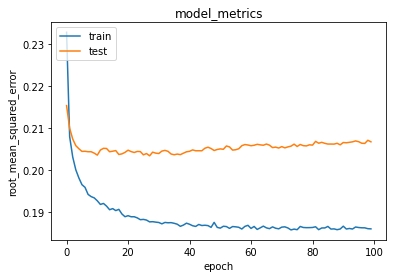

In [46]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Proses Rekomendasi**

### Membuat sistem rekomendasi 

In [47]:
movie_df = new_movie
df = preparation
 
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['id'].isin(movie_visited_by_user.movieId.values)]['id'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)


### Menerapkan Sistem Rekomendasi

In [48]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('----' * 8)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print("==================================")
    print("Movie Recomendation : ", row.title)
    print("Genre : ", row.genres)
    print('==================================')
 
print('----'* 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print("==================================")
    print("Movie Recomendation : ", row.title)
    print("Genre : ", row.genres)
    print('==================================')

Showing recommendations for users: 7
--------------------------------
movie with high ratings from user
--------------------------------
Movie Recomendation :  Super Mario Bros.
Genre :  ['Adventure', 'Comedy', 'Family', 'Fantasy']
Movie Recomendation :  Paris, France
Genre :  ['Drama', 'Comedy']
Movie Recomendation :  Cronos
Genre :  ['Drama', 'Horror', 'Thriller']
Movie Recomendation :  Little Big League
Genre :  ['Comedy', 'Family']
Movie Recomendation :  Wide Eyed and Legless
Genre :  ['TV Movie', 'Drama', 'Romance', 'Comedy']
--------------------------------
Top 10 movie recommendation
--------------------------------
Movie Recomendation :  Stonewall
Genre :  ['Romance', 'Drama', 'Comedy']
Movie Recomendation :  Michael
Genre :  ['Comedy', 'Drama', 'Fantasy']
Movie Recomendation :  Pennies from Heaven
Genre :  ['Drama', 'Music', 'Romance']
Movie Recomendation :  Shades of Ray
Genre :  ['Comedy', 'Romance']
Movie Recomendation :  Smashing Pumpkins: If All Goes Wrong
Genre :  ['Docu

### Menampilkan history rating terbaik yang diberikan user

In [50]:
preparation[(preparation["userId"] == 7) & (preparation["rating"] == 5.0)]

,userId,movieId,rating,title,genres
541,7,745,5.0,Super Mario Bros.,"[Adventure, Comedy, Family, Fantasy]"
553,7,1148,5.0,"Paris, France","[Drama, Comedy]"
559,7,1223,5.0,Cronos,"[Drama, Horror, Thriller]"
563,7,1242,5.0,Little Big League,"[Comedy, Family]"
